In [92]:
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import os

In [104]:
#Nieuw csv bestand maken met alle files in 1
if not os.path.exists('data'):
    os.makedirs('data')

for i in range(10, 27):
    if (os.path.exists("data/red_ball_coordinates_128px_0" + str(i) + ".csv")):
        ip = pd.read_csv("data/red_ball_coordinates_128px_0" + str(i) + ".csv", delimiter=",", decimal=".", header=0)
        ip.to_csv('data/red_ball_coordinates_128px_full.csv', mode='a', index=False, header=False)
        op = pd.read_csv("data/positions_xyz_128px_0" + str(i) + ".csv", delimiter=",", decimal=".", header=0).iloc[4:]
        op.to_csv('data/positions_xyz_128px_full.csv', mode='a', index=False, header=False)

In [105]:
# Inlezen van CSV-bestand
dataPositions = pd.read_csv('data/positions_xyz_128px_full.csv')
dataCoordinates = pd.read_csv('data/red_ball_coordinates_128px_full.csv')

# X zijn de 14 inputs, en y zijn de 3 outputs
X = dataPositions.values
y = dataCoordinates.values

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (25356, 3)
Shape of y: (25356, 14)


In [106]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)
dfX = imputer.fit_transform(X)
dfy = imputer.fit_transform(y)
display(dfy)


array([[  1.        ,  64.        ,  43.35      , ...,  84.5       ,
         68.5       , 118.5       ],
       [  1.        ,  64.        ,  43.79166667, ...,  85.63157895,
         68.5       , 118.5       ],
       [  1.        ,  64.        ,  43.41176471, ...,  86.5       ,
         68.5       , 118.5       ],
       ...,
       [ 68.57142857, 118.85714286,  60.5       , ...,  50.70833333,
         39.30263158,  44.23684211],
       [ 68.57142857, 118.85714286,  60.5       , ...,  48.50119048,
         40.09674923,  46.41331269],
       [ 68.57142857, 118.85714286,  60.5       , ...,  48.50119048,
         40.09674923,  46.41331269]])

In [107]:
X_train, X_test, y_train, y_test = train_test_split(dfy, dfX, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# y_train_scaled = scaler.fit_transform(y_train)

model = MLPRegressor(hidden_layer_sizes=(100, ), max_iter=28000, random_state=42)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)


In [108]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, y_pred)
print(f'R2 score: {r2}')

Mean Squared Error: 5.6776329242704096
R2 score: 0.7236272111621016


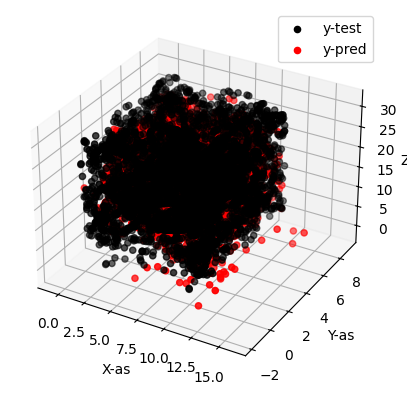

In [122]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(y_test[:, 0], y_test[:, 1], y_test[:, 2], label='y-test', c='black')
ax.scatter(y_pred[:, 0], y_pred[:, 1], y_pred[:, 2], label='y-pred', c='red')

ax.set_xlabel('X-as')
ax.set_ylabel('Y-as')
ax.set_zlabel('Z-as')
ax.legend()
# Toon de plot
plt.show()